In [3]:
import sys
import numpy as np
from pathlib import Path

# Add project root to Python path
project_root = Path().resolve().parent.parent  # Adjust based on your notebook location
sys.path.append(str(project_root))

# notebooks/exploration.ipynb
from estimation.utils.api_wrapper import StreetViewAPI
from estimation.analysis.segmentation import SidewalkSegmenter

Save folder: C:\Users\Juan\sidewalk_analysis\generic\images
Available classes: ['__background__', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']
Unique mask values: [False  True]
Sidewalk pixels: 14316
Mask shape: (520, 780)
Image shape: (400, 600, 3)


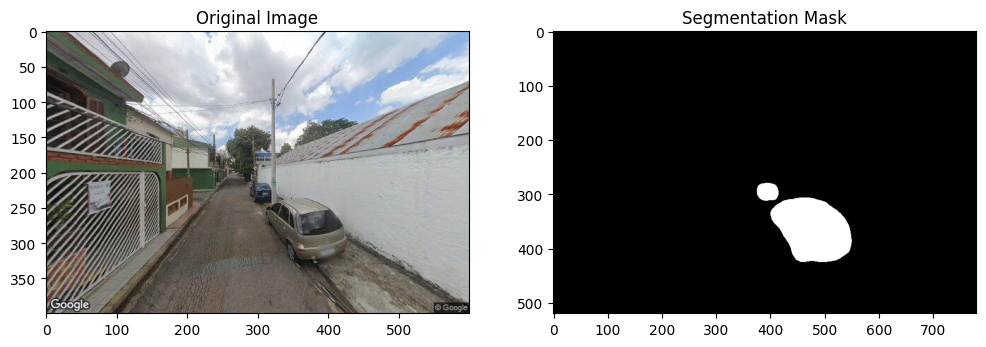

In [2]:
api = StreetViewAPI()
print("Save folder:", api.save_folder)
segmenter = SidewalkSegmenter()

# Download image
img_path = api.download_image(
    address="Rua Heitor de Andrade, 17 - Casas Populares, Santo André - SP, 09210-600",
    heading=90
)

# Process image
image, mask = segmenter.segment(img_path)
print("Unique mask values:", np.unique(mask))  # [False  True]
print("Sidewalk pixels:", np.sum(mask))       # > 0 (e.g., 12000)
print("Mask shape:", mask.shape)
print("Image shape:", image.shape)

# Visualize results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
    
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='gray')  # Simple grayscale mask
plt.title('Segmentation Mask')

plt.show()